参考  https://www.kaggle.com/bhuvanchennoju/cifar-10-image-classification-with-cnn

In [5]:
import os
for dirname, _, filenames in os.walk('/Users/zhanghaisheng/study/python/tf/cifar10'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import pandas as pd

In [6]:
# loading dateset
(x_train, y_train),(x_test,y_test) = cifar10.load_data() 

170508288/170498071 [==============================] - 39s 0us/step


In [11]:
#checking loaded data
print('total number of images in the dataset:',len(x_train) + len(x_test))
print('number of train images:',len(x_train))
print('number of test images:',len(x_test))
print('shape of training dataset:',x_train.shape)
print('shape of training dataset:',x_test.shape)

total number of images in the dataset: 60000
number of train images: 50000
number of test images: 10000
shape of training dataset: (50000, 32, 32, 3)
shape of training dataset: (10000, 32, 32, 3)


In [15]:
import matplotlib.pyplot as plt
def showImages(num_row,num_col,X,Y):
    %matplotlib inline
    from sklearn.utils import shuffle
    (X_rand,Y_rand) = shuffle(X,Y)
    fig,axes = plt.subplots(num_row,num_col,figsize=(12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(labels[Y_rand.item(i)]))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)
        
    return

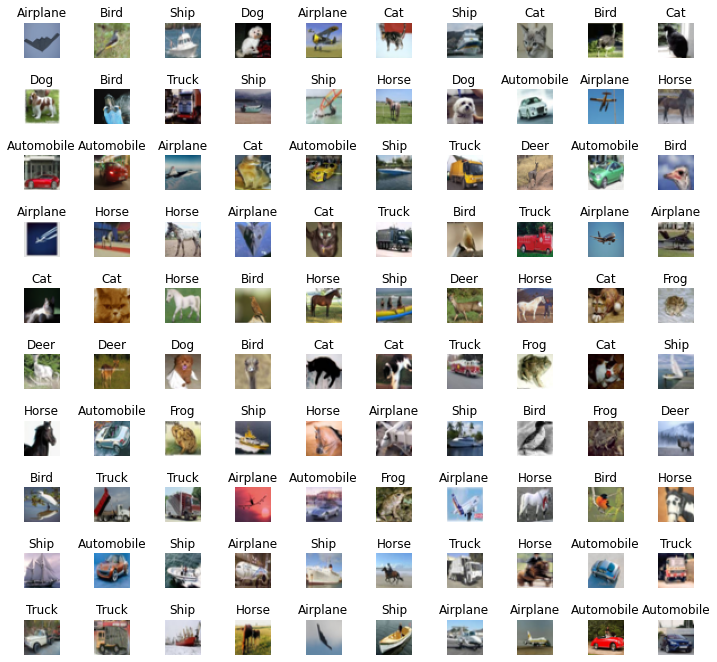

In [16]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
num_row = 10
num_col = 10
showImages(num_row,num_col,X =x_train,Y = y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


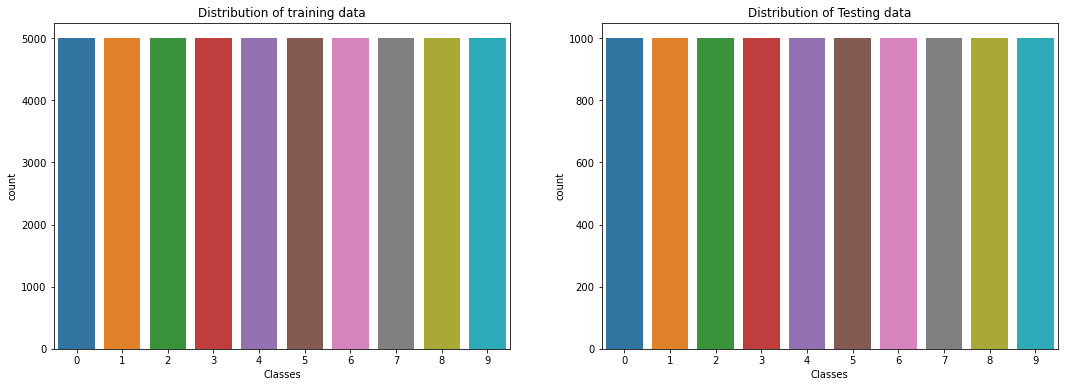

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
figure, axis = plt.subplots(1,2 ,figsize = (18,6))
sns.countplot(y_train.ravel(),ax = axis[0])
axis[0].set_title('Distribution of training data')
axis[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axis[1])
axis[1].set_title('Distribution of Testing data')
axis[1].set_xlabel('Classes')
plt.show()

In [24]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/ 255
x_test = x_test/255


y_train_one_hot = tf.keras.utils.to_categorical(y_train,10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test,10)
print('The one hot label is: ', y_train_one_hot[1])
print(y_train_one_hot.shape)

The one hot label is:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
(50000, 10)


In [43]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

#Building model computational graph
model = tf.keras.models.Sequential()
model.add(Conv2D(32,(3,3),activation ='relu', padding = 'same', input_shape = (32,32,3)))
model.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.8))
model.add(Dense(10, activation = 'softmax'))
loss = 'categorical_crossentropy'
opt = tf.keras.optimizers.Adam(learning_rate=0.0009,beta_1=0.9, beta_2=0.999,epsilon=1e-07)
metrics = ['accuracy']

model.compile(loss = loss, optimizer = opt, metrics = metrics)

hist = model.fit(x_train, y_train_one_hot, batch_size = 64 , epochs = 2, validation_split = 0.2)

Epoch 1/2
625/625 [==============================] - 96s 152ms/step - loss: 2.3029 - accuracy: 0.1003 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 2/2
625/625 [==============================] - 84s 135ms/step - loss: 2.3029 - accuracy: 0.1005 - val_loss: 2.3027 - val_accuracy: 0.0952


In [45]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_72 (ModuleWra (None, 32, 32, 32)        896       
_________________________________________________________________
module_wrapper_73 (ModuleWra (None, 32, 32, 32)        9248      
_________________________________________________________________
module_wrapper_74 (ModuleWra (None, 16, 16, 32)        0         
_________________________________________________________________
module_wrapper_75 (ModuleWra (None, 16, 16, 32)        0         
_________________________________________________________________
module_wrapper_76 (ModuleWra (None, 16, 16, 64)        18496     
_________________________________________________________________
module_wrapper_77 (ModuleWra (None, 16, 16, 64)        36928     
_________________________________________________________________
module_wrapper_78 (ModuleWra (None, 8, 8, 64)         

In [48]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

ImportError: cannot import name 'plot_model' from 'keras.utils' (/Users/zhanghaisheng/Library/Python/3.9/lib/python/site-packages/keras/utils/__init__.py)

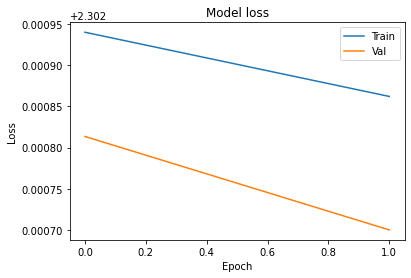

In [49]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

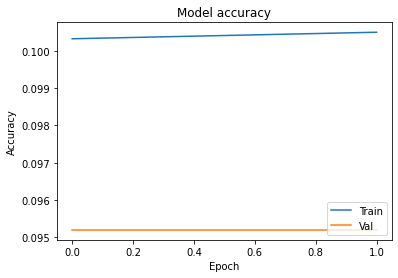

In [50]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [51]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 4s 14ms/step - loss: 2.3026 - accuracy: 0.1000


0.10000000149011612